In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

## Calculate the Distance

Implement the distance formula.  Note: there are a bunch of different ways you can do this in Python.

In [2]:
def distance(a, b):
    temp = a - b
    sum_sq = np.dot(temp.T, temp)
    return np.sqrt(sum_sq)

## Calculating All-Pairs Distances

Create a function that takes two values: n (the number of values to check) and d (the dimension).

Create n random vectors of d-dimensions. Calculate the distance divided by sqrt(d) between each pair and return the vector.

In [3]:
def all_pairs_distances(X):    
    distances = []
    n = len(X)
    for i in range(n):
        for j in range(i+1,n):
            dist = distance(X[i], X[j])
            distances.append(dist)
    return distances

## Loading Digits Dataset

In [4]:
X, y = load_digits(return_X_y = True)
distances = all_pairs_distances(X)

(array([1.89000e+02, 5.25000e+03, 2.42260e+04, 5.71760e+04, 1.77256e+05,
        4.77576e+05, 5.80117e+05, 2.60389e+05, 3.07920e+04, 7.35000e+02]),
 array([0.66143783, 1.55828093, 2.45512404, 3.35196715, 4.24881026,
        5.14565336, 6.04249647, 6.93933958, 7.83618268, 8.73302579,
        9.6298689 ]),
 <BarContainer object of 10 artists>)

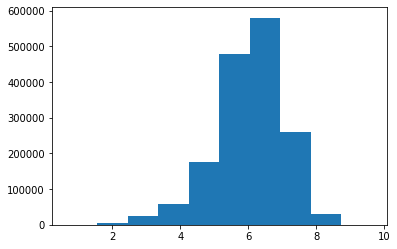

In [5]:
plt.hist(distances/np.sqrt(len(X[0])))

## K-Nearest Neighbors

What does this distribution of distances mean for k-nearest neighbors?

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_predict = neigh.predict(X_test)
score = accuracy_score(y_test, y_predict)
print("Testing Score: ", score)



Testing Score:  0.9833333333333333


## K-Means

What about clustering?

In [9]:
from sklearn.cluster import KMeans
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_train)

KMeans(n_clusters=16, random_state=0)

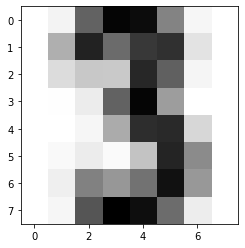

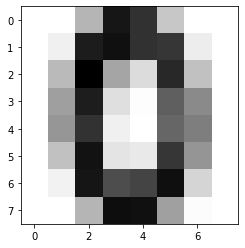

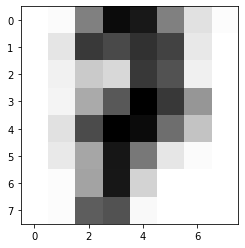

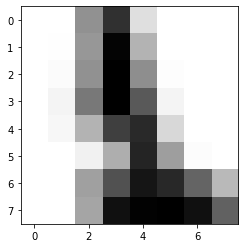

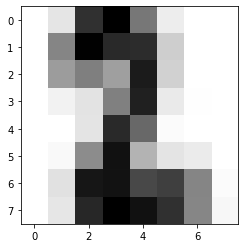

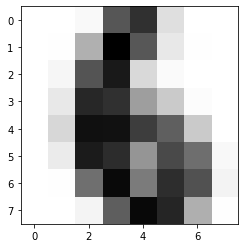

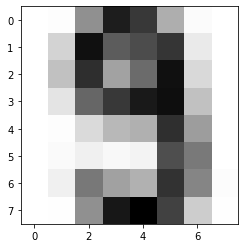

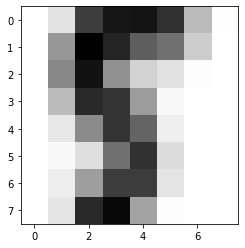

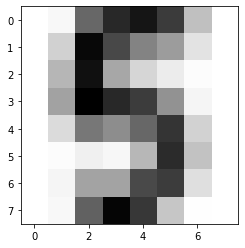

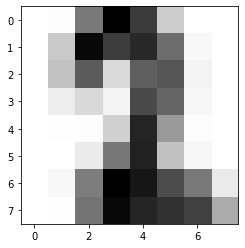

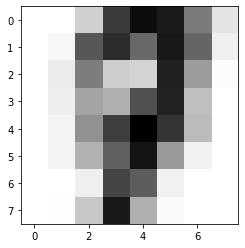

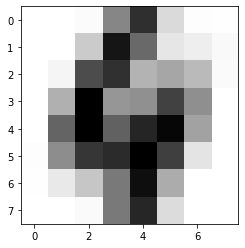

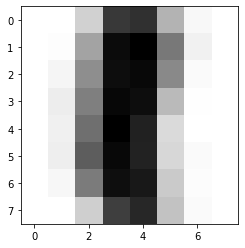

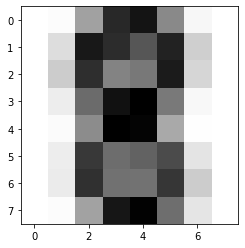

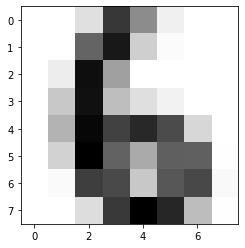

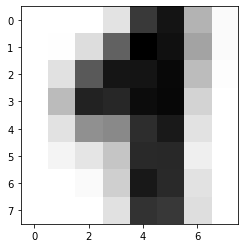

In [10]:
centers = kmeans.cluster_centers_.reshape(n_clusters,8,8)

for i in range(len(centers)):
    plt.figure()
    plt.imshow(centers[i,:,:], cmap="binary")